# Лабораторная работа №4 (вариант №4)

##Задание

Цель работы – написать программу на языках Python, выполняющую построение и обучение нейронных сетей прямого распространения, решающих задачу регрессии (выборки получены от преподавателя), требуется подобрать безизбыточную архитектуру сети, работающей с допустимым уровнем ошибки и визуализировать процесс обучения моделей. Результаты работы привести в отчете.

##Импорт библиотек

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
!pip install scikeras

In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [8]:
from google.colab import files
from google.colab import drive

In [9]:
# подключение диска

drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
path = "/content/drive/MyDrive/STUDY/магистратура курс 2/Нейронные сети/Lab_4/"

## Функции

##Расчет прочности бетона (пример)

В рамках данной лабораторной работы предполагается создание регрессионной модели с
помощью полносвязной нейронной для предсказания значения непрерывной целевой
переменной с помощью библиотеки TensorFlow.
Набор данных доступен по ссылке: https://www.kaggle.com/prathamtripathi/regression-with-neural-networking. Этот файл содержит различную информацию о различных цементах и
бетонах.

###Постановка задачи

Рассчитать прочность бетона. В набор входят следующие компоненты: цемент, доменный
шлак, летающий пепел, вода, суперпластификатор (жесткость цемента после высыхания),
крупный заполнитель (мелкие камни), мелкий заполнитель (песок), возраст (возраст или
время, прежде чем он нуждается в ремонте), прочность бетона (/кН) на кН.

###Cчитывание и просмотр набора данных

In [11]:
df = pd.read_csv(path + 'concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


###Подготовка данных

####Проверка на пропуски

In [12]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


####Матрица корреляции

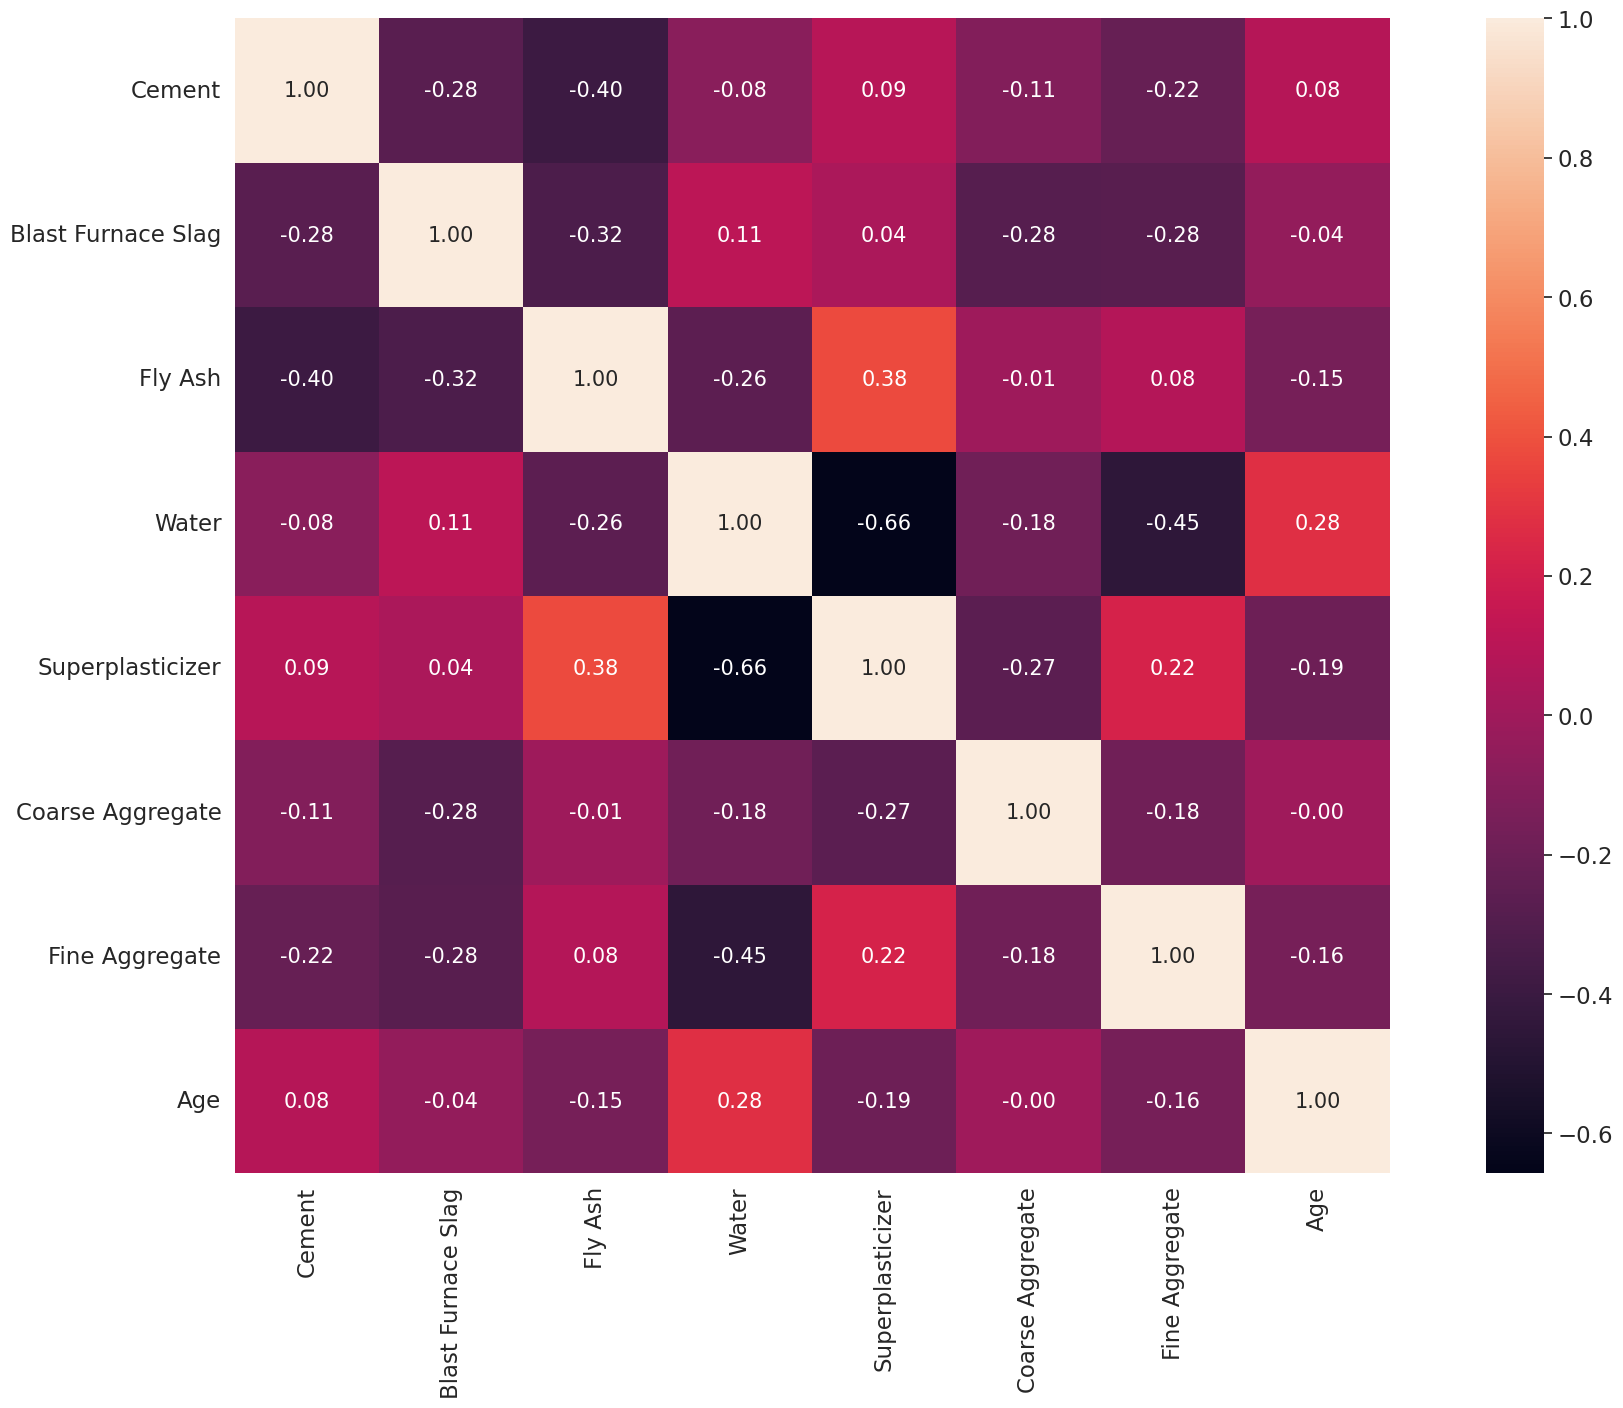

In [13]:
cols = df.drop('Strength', axis=1).columns
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(25,15))
hm = sns.heatmap(cm,
annot=True,
square=True,
fmt='.2f',
annot_kws={'size': 15},
yticklabels=cols,
xticklabels=cols)
plt.show()

###Разбиение на обучающую и тестовую выборки

In [14]:
X = df.drop('Strength', axis=1)
y = df['Strength']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state = 0)

###Стандартизация

In [15]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

###Модель полносвязной нейронной сети с использованием фреймворка Keras

Создадим полносвязную модель нейронной сети с одним скрытым слоем для решения
задачи регресии. Выходной слой возвращает одно число, обозначающие цену. В качестве
функции потерь используется средняя квадратическая ошибка (mse), оптимизатор — adam,
во время обучения будем отслеживать метрики mse и среднюю абсолютную ошибку (mae).

In [16]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))# скрытый слой
model.add(Dense(1, activation='linear'))# выходной слой с линейной функцией активации

model.compile(loss='mean_squared_error', # в качестве функции потерь используем mse
optimizer='adam',
metrics=['mae', 'mse'])

###Обучение модели

Выполните обучение модели на 50 эпохах, 20 процентов обучающей выборки будет
использовано для валидации. Можете изменить количество эпох обучения на более высокое
значение, однако это займет значительно больше времени.

In [17]:
history = model.fit(
    X_train,#
    y_train,
    validation_split=0.2,
    epochs = 50
  )

Epoch 1/50
21/21 [==============================] - 6s 62ms/step - loss: 1448.9352 - mae: 34.2819 - mse: 1448.9352 - val_loss: 1281.7183 - val_mae: 31.4940 - val_mse: 1281.7183
Epoch 2/50
21/21 [==============================] - 0s 19ms/step - loss: 997.9446 - mae: 27.2259 - mse: 997.9446 - val_loss: 689.4528 - val_mae: 21.5806 - val_mse: 689.4528
Epoch 3/50
21/21 [==============================] - 1s 25ms/step - loss: 432.8927 - mae: 16.3644 - mse: 432.8927 - val_loss: 258.3316 - val_mae: 12.7047 - val_mse: 258.3316
Epoch 4/50
21/21 [==============================] - 0s 18ms/step - loss: 228.0523 - mae: 12.3968 - mse: 228.0523 - val_loss: 228.6035 - val_mae: 12.1363 - val_mse: 228.6035
Epoch 5/50
21/21 [==============================] - 0s 15ms/step - loss: 202.6342 - mae: 11.5336 - mse: 202.6342 - val_loss: 205.6143 - val_mae: 11.7541 - val_mse: 205.6143
Epoch 6/50
21/21 [==============================] - 0s 20ms/step - loss: 190.2657 - mae: 11.2063 - mse: 190.2657 - val_loss: 194.86

####Визуализация процесса обучения

После постройте предсказания и визуализируйте их. Постройте м график для визуализации
изменения оценки модели на разных эпохах. Когда наступает переобучение?

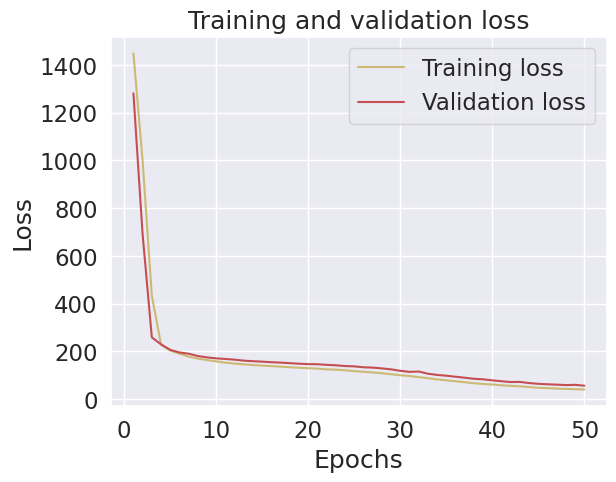

In [18]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

###Оценка модели

In [19]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print('Mean squared error from neural network: ', mse)
print('Mean absolute error from neural network: ', mae)
print('R2 score from neural network: ', r2)

7/7 [==============================] - 0s 3ms/step
Mean squared error from neural network:  48.39293235456586
Mean absolute error from neural network:  5.068654985335266
R2 score from neural network:  0.8162616827232854


##Аренда велосипедов в сутки (задание по вариантам)

В рамках данной лабораторной работы предполагается создание регрессионной модели с
помощью полносвязной нейронной для предсказания значения непрерывной целевой
переменной с помощью библиотеки TensorFlow.
Набор данных доступен по ссылке: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset. Этот набор данных содержит ежедневное количество арендованных велосипедов в период с 2011 по 2012 год в системе Capital bikeshare с соответствующей информацией о погоде и сезонах.

###Постановка задачи

Предсказываемое значение – количество аренд велосипедов в сутки (cnt).

- instant: индекс записи

	- dteday : дата

	- season : время года (1:зима, 2:весна, 3:лето, 4:осень)

	- yr : год (0: 2011, 1:2012)

	- mnth : месяц ( 1 to 12)

	- holiday : является ли день праздничным или нет

	- weekday : день недели

	- workingday : если день не является ни выходным, ни праздничным, равно 1, в противном случае равно 0.

	+ weathersit (погодные условия) :

		- 1: Ясно, малооблачно, Переменная облачность, Переменная облачность без осадков

		- 2: Туман + Облачно, Туман + Разорванные облака, Туман + Несколько облаков, Туман

		- 3: Небольшой снег, Небольшой дождь + Гроза + Рассеянные облака, Небольшой дождь + рассеянные облака

		- 4: Сильный дождь + Ледяные поддоны + Гроза + Туман, Снег + Туман

	- temp : Нормализованная температура в градусах Цельсия. Значения выводятся через (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (только в почасовой шкале)

	- atemp: Нормализованная температура ощущения в градусах Цельсия. Значения выводятся через (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (только в почасовой шкале)

	- hum: Нормализованная влажность. Значения делятся на 100 (макс.)

	- windspeed: Нормализованная скорость ветра. Значения делятся на 67 (макс.)

	- casual: количество случайных пользователей

	- registered: количество зарегистрированных пользователей

	- cnt: общее количество арендованных велосипедов, включая как обычные, так и зарегистрированные


###Cчитывание и просмотр набора данных

In [20]:
df = pd.read_csv(path + 'day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


###Подготовка данных

####Проверка на пропуски

In [21]:
# метод info() выводит информацию о датафрейме, включая названия столбцов,
# типы данных признаков и ненулевые значения

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [22]:
# isna() - обнаружение пропущенных значений

df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Как видно из информации выше, в датасете нет пропущенных значений ни по одному из признаков.

####Просмотр дубликатов

In [23]:
# просмотр дубликатов

df[df.duplicated]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


Дубликаты в датасете также отсутствуют.

####Просмотр описательной статистики

In [24]:
# Метод describe() генерирует описательную статистику

df.drop(columns=['instant',
                 'season',
                 'yr',
                 'mnth',
                 'dteday',
                 'weekday',
                 'holiday',
                 'workingday']).describe()

,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Согласно статистике:

- Максимальное кол-во арендованных велосипедов составило 8714;

- Минимальное кол-во арендованных велосипедов составило 22;

- Случайных пользователей в среднем меньше, чем зарегистрированных;

- "Разброс" количества случайных пользователей также меньше, чем зарегистрированных;

####Выявление зависимостей между признаками

In [25]:
# устанавливаем цвет фона графиков

sns.set_style("whitegrid")

Построим график количества арендованных велосипедов в зависимости от времени (то есть статистика за два года).

Text(0, 0.5, 'Кол-во велосипедов')

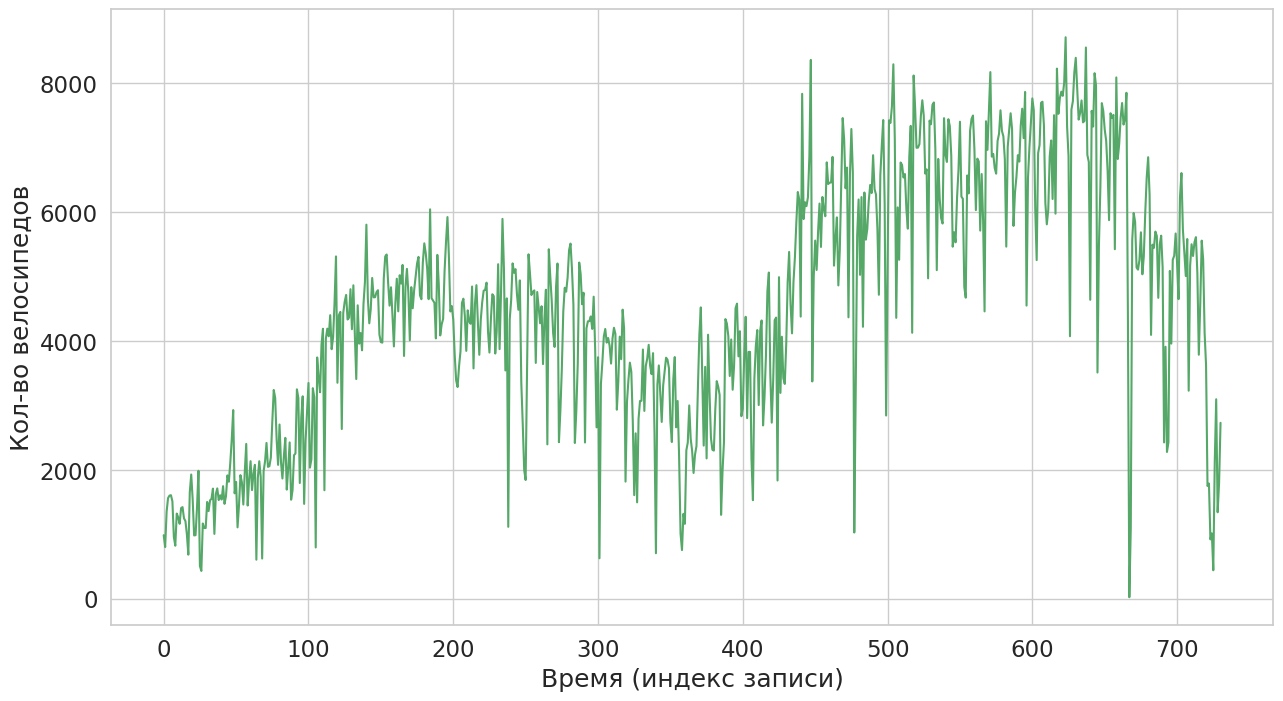

In [26]:
# график аренды велосипедов в зависимости от времени

# отсортировываем по году (по возрастанию)
plt.figure(figsize=(15,8))
sns.lineplot(df.sort_values(by=['yr'], ascending=True).cnt, color='g')
plt.xlabel('Время (индекс записи)')
plt.ylabel('Кол-во велосипедов')

По графику видно, что количество арендованных велосипедов во втором году ('yr' == 1) в среднем увеличилось. Также из графика можно сделать вывод о том, что количество велосипедов, которые взяли в аренду, значительно меняется в зависимости от времени года, и пик его приходится на летние месяцы.

####Матрица корреляции

Рассмотрим матрицу корреляции между признаками.

In [27]:
# удаляем из датасета столбцы с индексом и датой

dff = df.drop(columns=['instant','dteday'])

<Axes: >

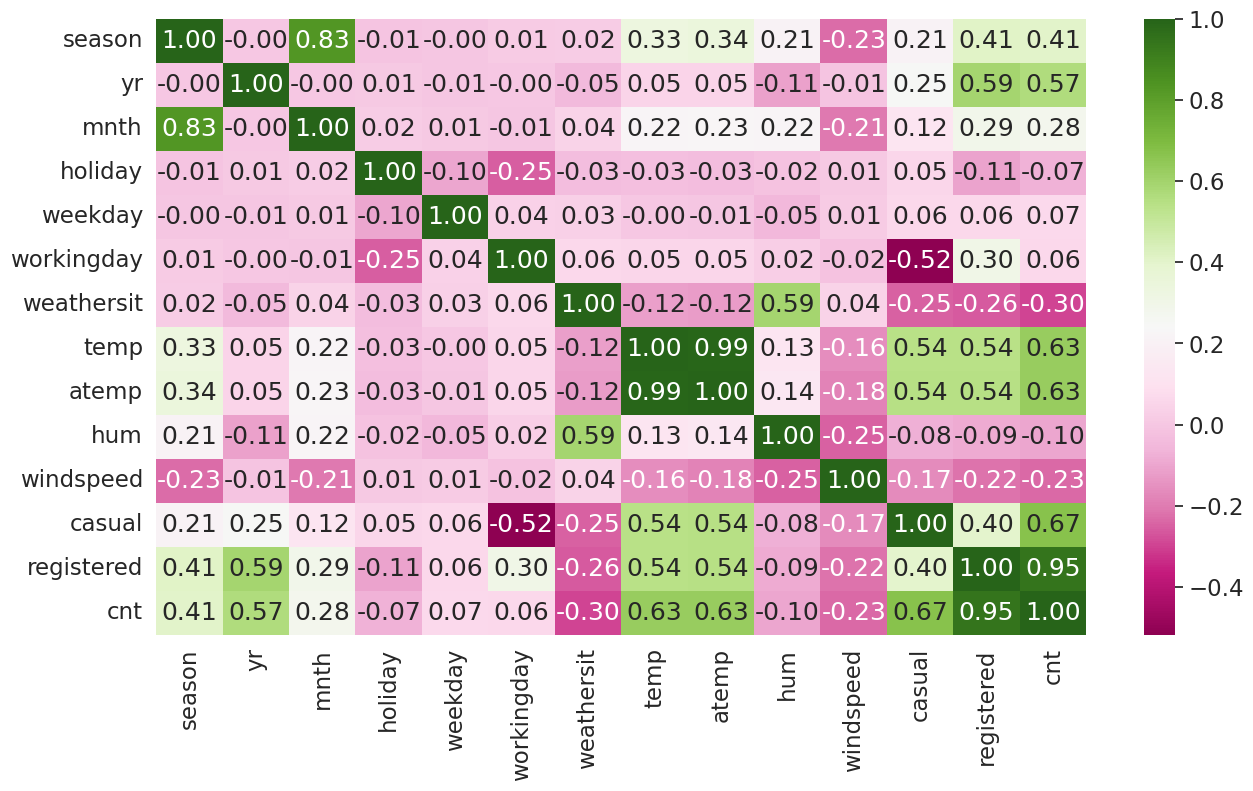

In [28]:
# строим матрицу корреляции

plt.figure(figsize=(15,8))
sns.heatmap(dff.corr(),annot=True,fmt='.2f',  cmap="PiYG")

Рассмотрим корреляцию некоторых признаков.

Классификация коэффициентов корреляции по силе.

* сильная (r > 0,70)

* средняя (0,50 < r < 0,69)

* умеренная (0,30 < r < 0,49)

* слабая (0,20 < r < 0,29)

* очень слабая (r < 0,19)


Отрицательная корреляция:

- season и windspeed (слабая). Для летних и осенних месяцев скорость ветра меньше, чем для зимних. Аналогично связаны windspeed и mnth.

- workingday и casual (средняя). В рабочие дни случайных арендаторов меньше. Так же, как и в плохую погоду - casual и weathersit.

- cnt и weathersit (умеренная). Чем хуже погодные условия, тем меньше велосипедов арендуют.

Положительная корреляция:

- season и cnt (умеренная). В теплое время года количество аренжованных велосипедов увеличивается.

- cnt и temp/atemp (средняя). В комфортную температуру арендаторов должно быть больше.



####Зависимость кол-ва арендованных велосипедов от месяца и года

Построим FacetGrid, чтобы рассмотреть зависимость целевой переменной cnt от года, месяца, дня недели и температуры.

In [29]:
# сгруппируем данные по году, месяцу и дню недели и усредним температуру

temp_mean = df.groupby(['yr', 'mnth', 'weekday']).mean().reset_index().round(1)

<ipython-input-29-de7da6e9908e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_mean = df.groupby(['yr', 'mnth', 'weekday']).mean().reset_index().round(1)


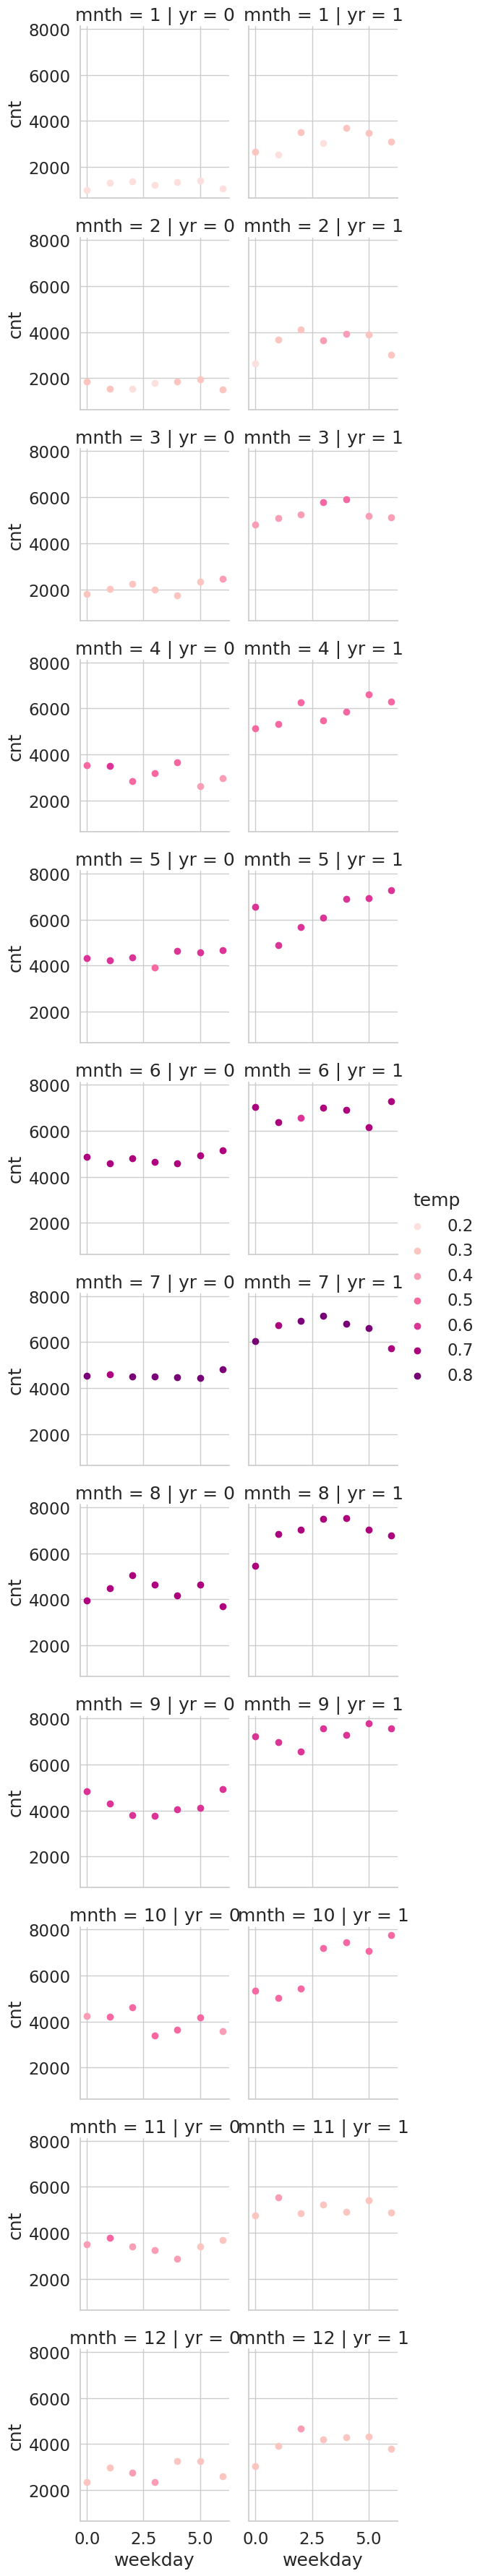

In [30]:
# построим FacetGrid

fg = sns.FacetGrid(temp_mean, col="yr", row="mnth", hue='temp',palette='RdPu')
fg.map(plt.scatter, "weekday","cnt").add_legend()

По столбцам можно отметить значительную разницу по годам. В остальном второй год ('yr' == 1) значительно не отличается от первого по температуре, зависимость аренды велосипедов от дня недели также незначительна.  

Если построить стобчатую диаграмму, видим, что чем хуже погодные условия, тем меньше арендаторов.

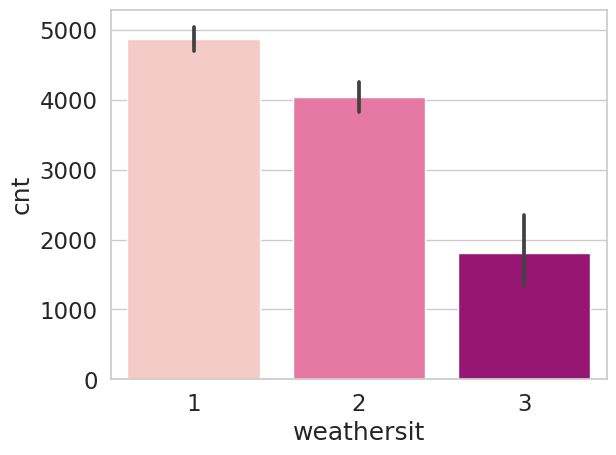

In [31]:
sns.barplot(x='weathersit', y='cnt', data=df, palette = 'RdPu')
plt.show()

####Сравнение усредненных по месяцам данных

Сгруппируем данные по годам, месяцам и усредним.

In [32]:
mnth_mean = df.groupby(['yr', 'mnth']).mean().reset_index().round(2)
#mnth_mean

<ipython-input-32-2bcb05ef9822>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mnth_mean = df.groupby(['yr', 'mnth']).mean().reset_index().round(2)


Разделим данные на две выборки - по первому году ('yr'== 0) и второму ('yr'== 1).

In [33]:
# первый год
df_y0_mean = mnth_mean[mnth_mean["yr"] == 0]['cnt']

# значение переменной cnt и метки
data0 = df_y0_mean.values
labels0 = df_y0_mean.index

# второй год
df_y1_mean = mnth_mean[mnth_mean["yr"] == 1]['cnt']

# значение переменной cnt и метки
data1 = df_y1_mean.values
labels1 = df_y1_mean.index - len(labels0)

#####Круговая диаграмма

Построим круговые диаграммы.

На одинаковые месяцы года в первом и втором году приходятся примерно одинаковые доли арендованных велосипедов (меньше - в холодное время года, больше - в теплое).

Text(0.5, 1.0, 'yr = 1')

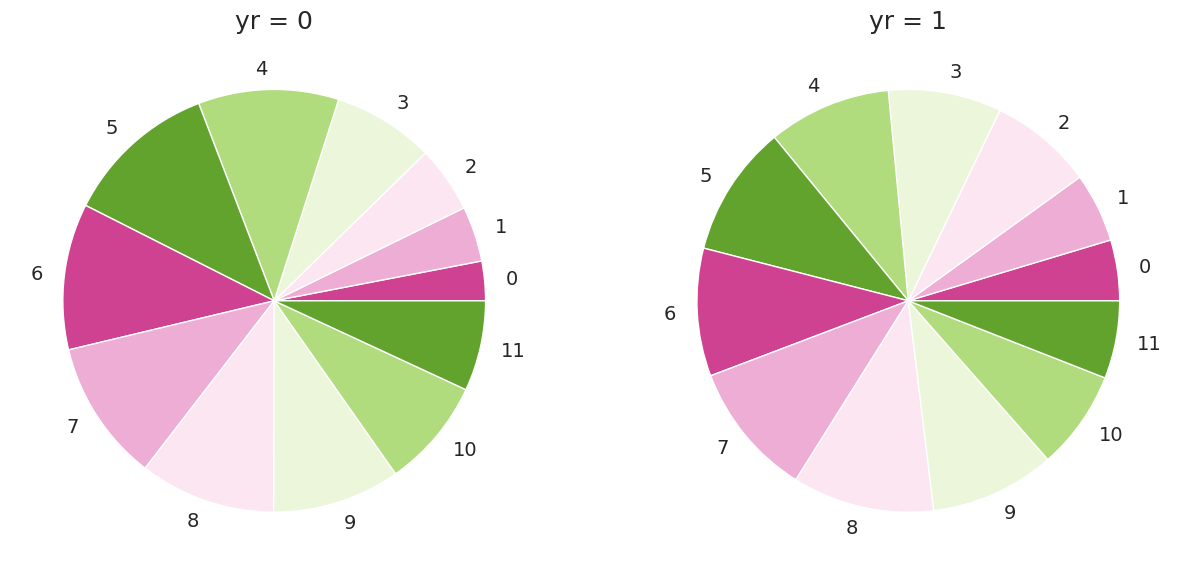

In [34]:
#colors = sns.color_palette('PRGn')
#colors = sns.color_palette('RdPu')

colors = sns.color_palette('PiYG')


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
ax1.pie(data0, labels = labels0, colors = colors, textprops={'fontsize': 14})
ax1.set_title("yr = 0")

ax2.pie(data1, labels = labels1, colors = colors, textprops={'fontsize': 14})
ax2.set_title("yr = 1")

#####Столбчатая диаграмма

ПОстроим столбчатую диаграмму, чтобы вместе с распределением количества по месяцам визуализировать различия между первым и вторым годом.

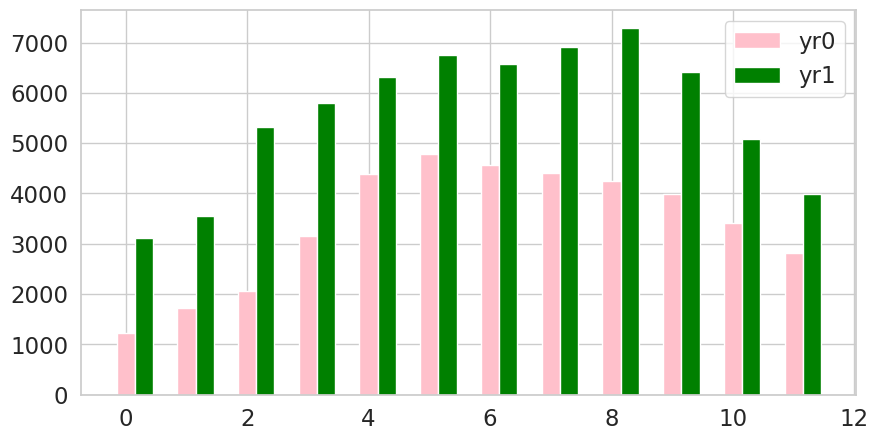

In [35]:
N = len(labels0)

yr0_bar = data0
yr1_bar = data1

ind = np.arange(N)

width = 0.3

plt.figure(figsize=(10,5))
plt.bar(ind, yr0_bar , width, label='yr0', color = 'pink')
plt.bar(ind + width, yr1_bar, width, label='yr1', color = 'green')
plt.legend(labels=['yr0','yr1'])

####Зависимость от праздничных и рабочих дней

Построим столбчатую диаграмму для переменной cnt и переменной workingday.

Как можно судить, количество арендованных велосипедов зависит от того, рабочий день или нет, незначительно.

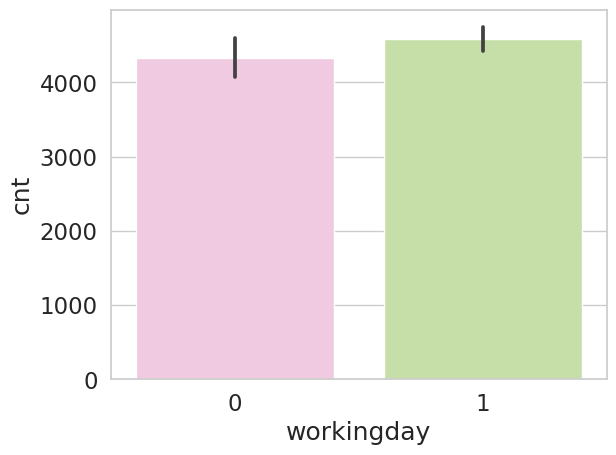

In [36]:
sns.barplot(x='workingday', y='cnt', data=df, palette = 'PiYG')
plt.show()

Построим аналогичную диаграмму, но для признака holiday.

В праздничные дни количество пользователей меньше.

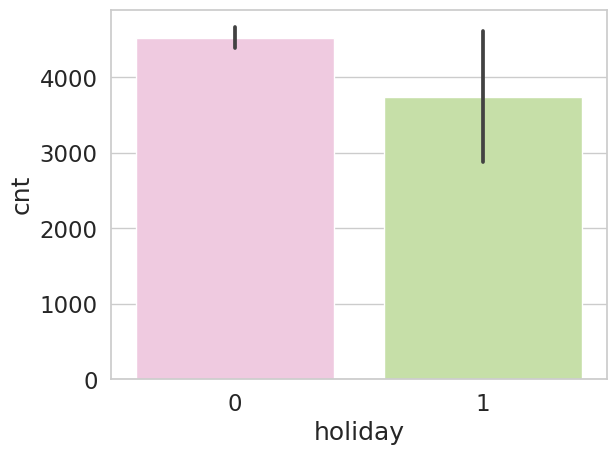

In [37]:
sns.barplot(x='holiday', y='cnt', data=df, palette = 'PiYG')
plt.show()

###Модели нейросетевых регрессоров

Создадим нейсколько моделей и сравним результаты между собой.

####Обучение с использованием всех признаков

Для начала создадим модель, которая будет обучаться на всех признаках.

#####Разбиение на обучающую и тестовую выборки

In [38]:
bicycles = pd.read_csv(path + 'day.csv')
bicycles.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [39]:
bicycles = bicycles.drop(columns=['instant','dteday'])

In [40]:
X = bicycles.drop('cnt', axis=1)
y = bicycles['cnt']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state = 0)

#####Стандартизация

In [41]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)

#####Модель полносвязной нейронной сети

Создадим полносвязную модель нейронной сети с одним скрытым слоем для решения
задачи регресии. Выходной слой возвращает одно число, обозначающие цену. В качестве
функции потерь используется средняя квадратическая ошибка (mse), оптимизатор — adam,
во время обучения будем отслеживать метрики mse и среднюю абсолютную ошибку (mae).

In [42]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))# скрытый слой
model.add(Dense(1, activation='linear'))# выходной слой с линейной функцией активации

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mae', 'mse']
            )

#####Обучение модели

Выполним обучение модели на 50 эпохах, используя 20% обучающей выборки для валидации.

In [43]:
history = model.fit(
    X_train_standardized,#
    y_train,
    validation_split=0.2,
    epochs = 50
  )

Epoch 1/50
15/15 [==============================] - 1s 17ms/step - loss: 23955924.0000 - mae: 4511.7285 - mse: 23955924.0000 - val_loss: 23218342.0000 - val_mae: 4418.1626 - val_mse: 23218342.0000
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 23905328.0000 - mae: 4505.9258 - mse: 23905328.0000 - val_loss: 23144092.0000 - val_mae: 4409.7661 - val_mse: 23144092.0000
Epoch 3/50
15/15 [==============================] - 0s 5ms/step - loss: 23803912.0000 - mae: 4494.9238 - mse: 23803912.0000 - val_loss: 22999280.0000 - val_mae: 4394.1675 - val_mse: 22999280.0000
Epoch 4/50
15/15 [==============================] - 0s 6ms/step - loss: 23612294.0000 - mae: 4474.9614 - mse: 23612294.0000 - val_loss: 22742856.0000 - val_mae: 4367.5903 - val_mse: 22742856.0000
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 23282662.0000 - mae: 4441.8115 - mse: 23282662.0000 - val_loss: 22315980.0000 - val_mae: 4324.5762 - val_mse: 22315980.0000
Epoch 6/50
15/15 [=

######Визуализация процесса обучения

Визуализируем процесс обучения. Как видно из графика, процесс обучения был достаточно "гладким". На 50 эпохах переобучение не наступило.

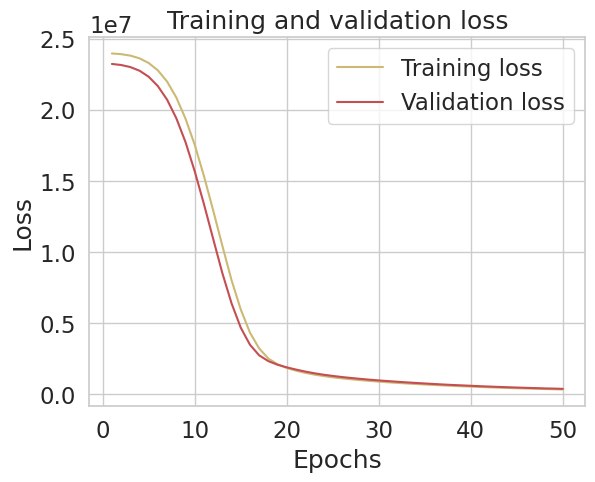

In [44]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#####Оценка модели

In [45]:
predictions = model.predict(X_test_standardized)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print('Mean squared error from neural network: ', mse)
print('Mean absolute error from neural network: ', mae)
print('R2 score from neural network: ', r2)

5/5 [==============================] - 0s 3ms/step
Mean squared error from neural network:  418985.46406184905
Mean absolute error from neural network:  494.9977039155506
R2 score from neural network:  0.9014880333718884


**Коэффициент детерминации: 0.91**
Построенная с заданными параметрами модель хорошо справилась с регрессией на данном наборе.

####Обучение с использованием части признаков

Теперь попробуем провести обучение на части признаков, убрав те, которые сильно коррелируют между собой. Например, такие, как season и mnth, temp и atemp.

#####Разбиение на обучающую и тестовую выборки

In [46]:
X = bicycles.drop('cnt', axis=1)[['season', 'holiday', 'weathersit', 'atemp', 'workingday', 'weekday','yr']]
y = bicycles['cnt']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state = 0)

#####Стандартизация

In [47]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)

#####Модель полносвязной нейронной сети

Создадим полносвязную модель нейронной сети с одним скрытым слоем для решения
задачи регресии. Выходной слой возвращает одно число, обозначающие цену. В качестве
функции потерь используется средняя квадратическая ошибка (mse), оптимизатор — adam,
во время обучения будем отслеживать метрики mse и среднюю абсолютную ошибку (mae).

In [48]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))# скрытый слой
model.add(Dense(1, activation='linear'))# выходной слой с линейной функцией активации

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mae', 'mse']
            )

#####Обучение модели

Параметры обучения оставим такими же, как в предыдущей модели.

In [49]:
history = model.fit(
    X_train_standardized,#
    y_train,
    validation_split=0.2,
    epochs = 50
  )

Epoch 1/50
15/15 [==============================] - 1s 17ms/step - loss: 23957690.0000 - mae: 4511.9844 - mse: 23957688.0000 - val_loss: 23226242.0000 - val_mae: 4419.2178 - val_mse: 23226242.0000
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 23919178.0000 - mae: 4507.5815 - mse: 23919178.0000 - val_loss: 23171072.0000 - val_mae: 4412.9463 - val_mse: 23171072.0000
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 23845812.0000 - mae: 4499.3496 - mse: 23845812.0000 - val_loss: 23069948.0000 - val_mae: 4401.6919 - val_mse: 23069948.0000
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: 23714120.0000 - mae: 4485.2148 - mse: 23714120.0000 - val_loss: 22897594.0000 - val_mae: 4383.0015 - val_mse: 22897594.0000
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: 23499272.0000 - mae: 4462.2153 - mse: 23499272.0000 - val_loss: 22619854.0000 - val_mae: 4353.3623 - val_mse: 22619854.0000
Epoch 6/50
15/15 [=

######Визуализация процесса обучения

Построим график процесса обучения. В этом случае можно отметить, что кривая потерь при валидации после 20-й эпохи находится немного выше, чем кривая потерь обучения.

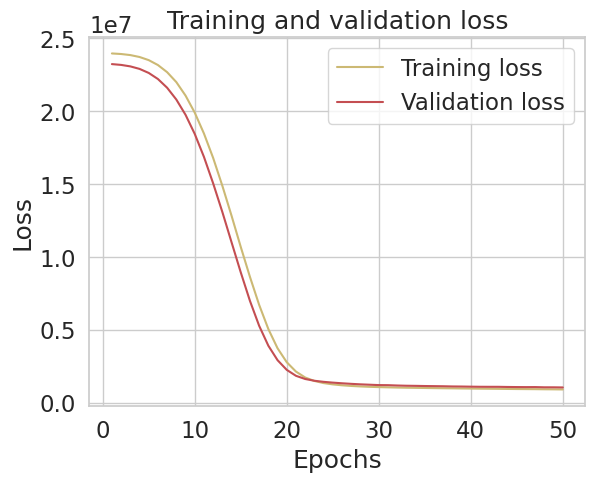

In [50]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#####Оценка модели

In [51]:
predictions = model.predict(X_test_standardized)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print('Mean squared error from neural network: ', mse)
print('Mean absolute error from neural network: ', mae)
print('R2 score from neural network: ', r2)

5/5 [==============================] - 0s 3ms/step
Mean squared error from neural network:  1082547.9251921412
Mean absolute error from neural network:  810.5838755912521
R2 score from neural network:  0.7454710622989124


**Коэффициент детерминации: 0.75**
Модель, обученная на части признаков, предсказывает значения хуже, чем модель, обученная на всей совокупности признаков.

####Подбор параметров

Попробуем повысить точность. Для этого создадим модель, которая также будет обучаться на всех признаках.

#####Разбиение на обучающую и тестовую выборки

In [52]:
X = bicycles.drop('cnt', axis=1)
y = bicycles['cnt']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state = 0)

#####Стандартизация

In [53]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)

#####Модель полносвязной нейронной сети

Добавим в модель ещё один скрытый слой. Таким образом, модель будет содержать 4 слоя. Функция активации внутренних слоев - relu, выходного - linear.

In [54]:
model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))# выходной слой с линейной функцией активации

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mae', 'mse']
            )

#####Обучение модели

Выполним обучение модели на 50 эпохах.

In [55]:
history = model.fit(
    X_train_standardized,#
    y_train,
    validation_split=0.2,
    epochs = 50
  )

Epoch 1/50
15/15 [==============================] - 1s 17ms/step - loss: 23955848.0000 - mae: 4511.8091 - mse: 23955848.0000 - val_loss: 23213744.0000 - val_mae: 4417.9619 - val_mse: 23213744.0000
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: 23872656.0000 - mae: 4502.5181 - mse: 23872656.0000 - val_loss: 23044854.0000 - val_mae: 4399.8154 - val_mse: 23044854.0000
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 23549314.0000 - mae: 4468.7739 - mse: 23549314.0000 - val_loss: 22460208.0000 - val_mae: 4339.2295 - val_mse: 22460208.0000
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 22546008.0000 - mae: 4367.5449 - mse: 22546008.0000 - val_loss: 20864540.0000 - val_mae: 4176.7769 - val_mse: 20864540.0000
Epoch 5/50
15/15 [==============================] - 0s 8ms/step - loss: 20217470.0000 - mae: 4124.3848 - mse: 20217470.0000 - val_loss: 17345604.0000 - val_mae: 3807.3574 - val_mse: 17345604.0000
Epoch 6/50
15/15 [=

######Визуализация процесса обучения

Визуализируем процесс обучения.

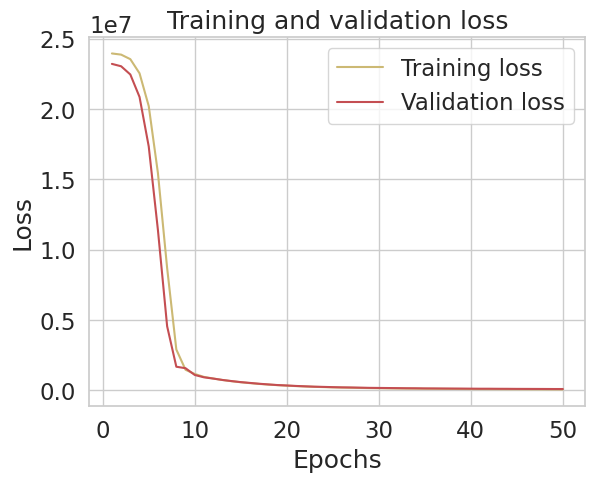

In [56]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#####Оценка модели

In [57]:
predictions = model.predict(X_test_standardized)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print('Mean squared error from neural network: ', mse)
print('Mean absolute error from neural network: ', mae)
print('R2 score from neural network: ', r2)

5/5 [==============================] - 0s 3ms/step
Mean squared error from neural network:  125798.00268282939
Mean absolute error from neural network:  251.2154997741284
R2 score from neural network:  0.9704223422883601


**Коэффициент детерминации: 0.97**
Таким образом, добавление ещё одного скрытого слоя позволило добиться более высокой точности, при этом на 50 эпохах переобучение не наступило.